In [6]:
# Import Libraries
import pandas as pd

In [7]:
# Load the Data
file_path = "WA_Breweries.csv"
breweries_df = pd.read_csv(file_path)


In [8]:

# Explore the Data
print(breweries_df.head())  # Check the first few rows
print(breweries_df.info())  # Summary of the DataFrame




                      brewery satellite_location brewery_type  \
0         192 Brewing Company       Mount Vernon      taproom   
1         192 Brewing Company                NaN      brewpub   
2  20 Corners Brewing Company                NaN      brewpub   
3         210 Brewing Company                NaN      taproom   
4            23rd Ave Brewery                NaN        micro   

                       address          city  zipcode     county     latitude  \
0        1405 South 2nd Street  Mount Vernon    98273     Skagit  48.41177416   
1   7324 NE 175th Street Ste F       Kenmore    98028       King   47.7566771   
2  14148 NE 190th St - Suite A   Woodinville    98072       King  47.76506654   
3     3438 Stoluckquamish Lane     Arlington    98223  Snohomish   48.2135319   
4            2313 S Jackson St       Seattle    98144       King     47.59927   

      longitude  year_established  guild_member  production_data_2017  \
0  -122.3379704              2010             1  

In [9]:
# Clean the Data
# handle missing values
breweries_df.dropna(inplace=True)  # Drop rows with missing values

# Save the Cleaned Data
cleaned_file_path = "cleaned_WA_Breweries.csv"
breweries_df.to_csv(cleaned_file_path, index=False)



In [15]:

import folium

#Load the Data
file_path = "WA_Breweries.csv"
breweries_df = pd.read_csv(file_path)

# Filter Microbreweries for 2022
microbreweries_2022_df = breweries_df[(breweries_df['year_established'] <= 2022)]

# Create a Map
# Start with a base map centered around Washington State
map_microbreweries = folium.Map(location=[47.7511, -120.7401], zoom_start=7)

# Add markers for each microbrewery
for index, row in microbreweries_2022_df.iterrows():
    brewery_name = row['brewery']
    
    # Clean latitude and longitude values
    brewery_lat = float(row['latitude'].strip(','))
    brewery_lon = float(row['longitude'].strip(','))
    
    brewery_popup = f"{brewery_name}"
    folium.Marker(location=[brewery_lat, brewery_lon], popup=brewery_popup).add_to(map_microbreweries)

# Display the Map
map_microbreweries.save("microbreweries_map.html")
map_microbreweries


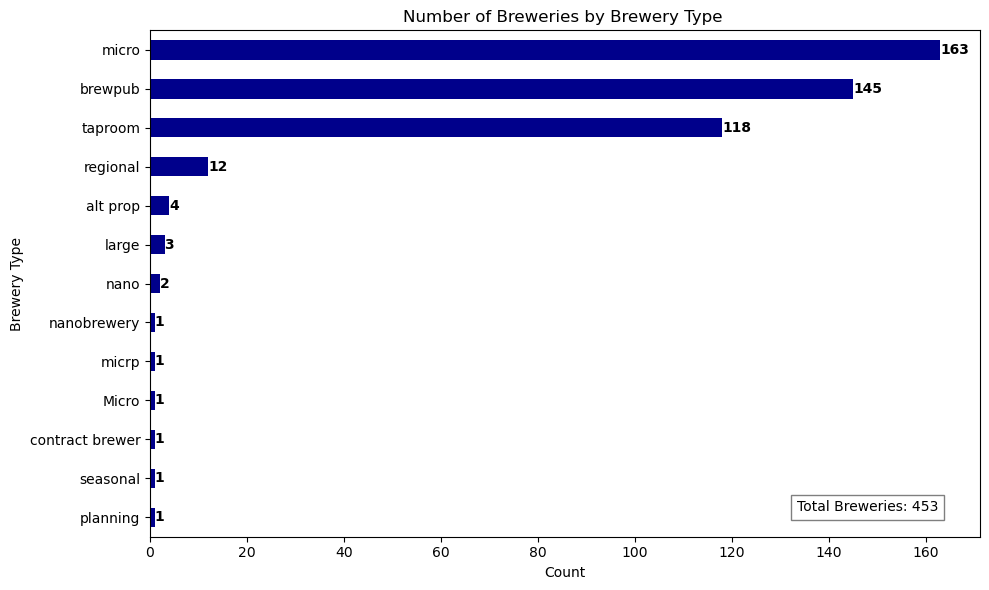

In [30]:
import matplotlib.pyplot as plt

# Count the total number of breweries
total_breweries = len(breweries_df)

# Count the occurrences of each brewery type
brewery_type_counts = breweries_df['brewery_type'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
brewery_type_counts.plot(kind='barh', color='darkblue')  # Horizontal bar plot and color change
plt.title('Number of Breweries by Brewery Type '.format(total_breweries))  # Add total count to title
plt.xlabel('Count')
plt.ylabel('Brewery Type')
plt.gca().invert_yaxis()  # Invert y-axis to display brewery types from top to bottom

# Add counts at the top of each bar
for i, count in enumerate(brewery_type_counts):
    plt.text(count, i, str(count), va='center', color='black', fontweight='bold')

# Add total count somewhere on the plot
plt.text(0.95, 0.05, 'Total Breweries: {}'.format(total_breweries), transform=plt.gca().transAxes, 
         ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()
